In [47]:
#In the axisdata.csv dataset, we are analyzing cars sold by employees
#Load the data
import pandas as pd
Location = "datasets/axisdata.csv"
df = pd.read_csv(Location)
df.tail()

,Fname,Lname,Gender,Hours Worked,SalesTraining,Years Experience,Cars Sold
994,Victor,Kane,M,22,Y,5,4
995,Charles,Turner,M,45,N,1,4
996,August,Franklin,F,34,Y,4,3
997,Victoria,Rogers,F,29,N,5,1
998,Mike,Gerardo,M,20,N,3,3


In [84]:
#Average number of cars sold by an employee in a month
averageCarsSoldPerMonth = df['Cars Sold'].mean()
print("The average cars sold per month is:", averageCarsSoldPerMonth)

#Maximum number of cars sold by an employee in a month
maxCarsSoldPerMonth = df['Cars Sold'].max()
print("The maximum number of cars sold per month is:", maxCarsSoldPerMonth)

#Minimum number of cars sold by an employee in a month
minCarsSoldPerMonth = df['Cars Sold'].min()
print("The minimum number of cars sold per month is:", minCarsSoldPerMonth)

The average cars sold per month is: 3.9229229229229228
The maximum number of cars sold per month is: 7
The minimum number of cars sold per month is: 1


In [49]:
#Number of cars sold grouped by gender
averageCarsSoldPerMonthGender = df.groupby('Gender', as_index=False)['Cars Sold'].mean()
print("The average number of cars sold per month by gender is:")
print(averageCarsSoldPerMonthGender)

The average number of cars sold per month by gender is:
  Gender  Cars Sold
0      F   3.760736
1      M   4.078431


In [50]:
#Number of cars sold grouped by hours worked
averageHoursWorkedPerMonth = df[df['Cars Sold'] > 3].groupby('Cars Sold', as_index=False)['Hours Worked'].mean()
print("The average number of hours worked by people selling more than 3 cars per month is:")
print(averageHoursWorkedPerMonth)


The average number of hours worked by people selling more than 3 cars per month is:
   Cars Sold  Hours Worked
0          4     33.945545
1          5     33.184466
2          6     36.429487
3          7     43.440000


In [51]:
#Average years of experience for employees
averageExperience = df['Years Experience'].mean()
print("The average years of experience per salesperson is:", averageExperience)

#Cars sold grouped by years of experience
averageExperiencePerCarsSold = df[df['Cars Sold'] > 3].groupby('Cars Sold', as_index=False)['Years Experience'].mean()
print("The average years of experience for salespersons selling more than 3 cars per month is:")
print(averageExperiencePerCarsSold)

The average years of experience per salesperson is: 3.026026026026026
The average years of experience for salespersons selling more than 3 cars per month is:
   Cars Sold  Years Experience
0          4          3.004950
1          5          2.961165
2          6          3.102564
3          7          3.800000


In [52]:
#Cars sold grouped by whether the employees received sales training or not
averageCarsSoldBySalesTraining = df.groupby('SalesTraining', as_index=False)['Cars Sold'].mean()
print(averageCarsSoldBySalesTraining)

  SalesTraining  Cars Sold
0             N   3.573850
1             Y   4.168942


In [55]:
#What do you think is the best indicator of whether someone is a good salesperson?
#First lets see how much of cars sold is explained by whether the employee received sales training
import statsmodels.formula.api as sm
X = df['SalesTraining']
Y = df['Cars Sold']
result = sm.ols(
    formula='Y ~ X',
    data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     38.16
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           9.46e-10
Time:                        20:27:57   Log-Likelihood:                -1821.1
No. Observations:                 999   AIC:                             3646.
Df Residuals:                     997   BIC:                             3656.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5738      0.074     48.441      0.000       3.429       3.719
X[T.Y]         0.5951      0.096      6.178      0.000       0.406       0.784
==============================================================================
Omnibus:                      238.179   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.408
Skew:                          -0.007   Prob(JB):                     3.75e-10
Kurtosis:                       1.979   Cond. No.                         2.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
#It looks like sales training is not a very good indicator of cars sold due to low R-squared.
#Let's see if gender explains cars sold
X = df['Gender']
Y = df['Cars Sold']
result = sm.ols(
    formula='Y ~ X',
    data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     10.91
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           0.000989
Time:                        20:29:59   Log-Likelihood:                -1834.5
No. Observations:                 999   AIC:                             3673.
Df Residuals:                     997   BIC:                             3683.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7607      0.069     54.731      0.000       3.626       3.896
X[T.M]         0.3177      0.096      3.304      0.001       0.129       0.506
==============================================================================
Omnibus:                      169.539   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.176
Skew:                          -0.040   Prob(JB):                     5.13e-09
Kurtosis:                       2.046   Cond. No.                         2.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
#As you can see, gender is not a good indicator for cars sold because of the low R-squared
#Let's see of years of experience is a good indicator for cars sold
X = df['Years Experience']
Y = df['Cars Sold']
result = sm.ols(
    formula='Y ~ X',
    data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.919
Date:                Wed, 18 Nov 2020   Prob (F-statistic):             0.0480
Time:                        20:33:23   Log-Likelihood:                -1837.9
No. Observations:                 999   AIC:                             3680.
Df Residuals:                     997   BIC:                             3690.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7156      0.115     32.226      0.000       3.489       3.942
X              0.0685      0.035      1.980      0.048       0.001       0.136
==============================================================================
Omnibus:                      176.520   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.702
Skew:                          -0.029   Prob(JB):                     3.95e-09
Kurtosis:                       2.037   Cond. No.                         8.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
#Years of experience is not a good indicator for cars sold due to low R-squared.
#Let's see if hours worked is a good indicator for cars sold
X = df['Hours Worked']
Y = df['Cars Sold']
result = sm.ols(
    formula='Y ~ X',
    data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     67.06
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           8.02e-16
Time:                        20:32:35   Log-Likelihood:                -1807.4
No. Observations:                 999   AIC:                             3619.
Df Residuals:                     997   BIC:                             3629.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3507      0.198     11.895      0.000       1.963       2.738
X              0.0466      0.006      8.189      0.000       0.035       0.058
==============================================================================
Omnibus:                      399.788   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.533
Skew:                          -0.012   Prob(JB):                     6.45e-12
Kurtosis:                       1.888   Cond. No.                         147.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
#Hours worked is the best indicator for cars sold in this dataset. However, it still has a low R-squared.

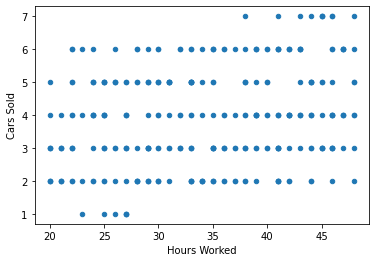

In [83]:
#A scatterplot of hours worked and cars sold
df.head(300).plot(x='Hours Worked', y= 'Cars Sold', kind = 'scatter')


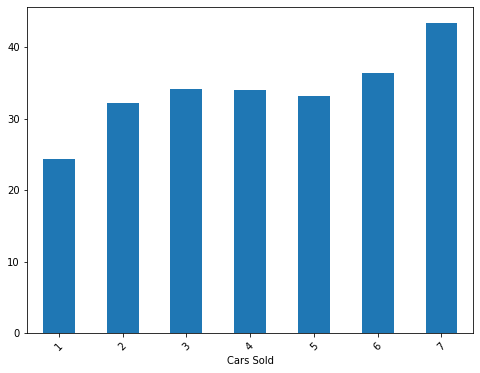

In [81]:
#A bar plot of hours worked and cars sold
df.groupby('Cars Sold')['Hours Worked'].mean().plot(kind='bar', rot=45, fontsize=10, figsize=(8, 6))